In [ ]:
# https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop

In [1]:
datafile = "C:\\Users\\Anatl\\PythonCode\\resources\\exams_datasets\\matala2_cosmetics_2019-Nov.csv" 

# PATH = "H:\\My Drive\\goldanat@post.bgu.ac.il 2022-12-28 12 50\\Research\\Datasets\\Cosmetics\\"
# datafile = PATH + "2019-Nov.csv"

In [2]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv(datafile)
# data['event_time'] = data['event_time'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))

# print((data.event_time).min())
# print((data.event_time).max())

C:\Users\anatl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [5]:
print(len(pd.unique(data['user_id'])))
print(len(pd.unique(data['user_session'])))

368232
942023


# 1.  Add Duration to next event column

### handle time:

In [6]:
data['event_time'][0]

'2019-11-01 00:00:02 UTC'

In [7]:
data['event_time'] = data['event_time'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))

### sort the item by user_id, event_time

In [8]:
data = data.sort_values(by=['user_id','event_time'],ascending=[True,True])


In [1]:
## אפשר גם להוסיף את הסשן למיון
# data = data.sort_values(['user_id','user_session','event_time'])


### calculate the duration till the next events:

In [9]:
start = datetime.datetime.now()

data['next_user'] = data['user_id'].shift(-1)
data['next_event_time'] = data['event_time'].shift(-1,fill_value=0)

data['duration_to_next_event'] = (data['next_event_time']-data['event_time']).apply(datetime.timedelta.total_seconds)
#השורה הזו מאפסת את הערך כאשר מדובר במעבר לסשן הבא (באירוע האחרון בסשן):
data['duration_to_next_event'] = data['duration_to_next_event'] * np.where(data['next_user']==data['user_id'],1,0)

end = datetime.datetime.now()
print(end-start)

## ANOTHER WAY (a bit slower because we apply a function on the entire row)
# def calc_time_to_next(row):
#     if (row['next_user']== row['user_id']):
#         return int((row['next_event_time']-row['event_time']).total_seconds())
#     else:
#         return (0)
# data['duration_to_next_event'] = data.apply(calc_time_to_next ,axis=1)


C:\Users\anatl\AppData\Local\Temp/ipykernel_2936/2304314931.py:4: FutureWarning: Passing <class 'int'> to shift is deprecated and will raise in a future version, pass Timestamp instead.
  data['next_event_time'] = data['event_time'].shift(-1,fill_value=0)


0:00:30.389035


In [110]:
### ANOTHER WAY TO DO THE SAME:

# def date_diff(df):
#     df['duration_to_next_event'] = df['event_time'] - df['event_time'].shift(-1)
#     df['duration_to_next_event'].fillna(pd.Timedelta(seconds=0) ,inplace = True)
#     return df

# data = a.groupby(data['user_session']).apply(date_diff)
# data['duration_to_next_event'] = data['duration_to_next_event'].dt.total_seconds()


In [43]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,next_user,next_event_time,duration_to_next_event
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1458813.0,2019-11-19 09:56:09,0.0
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,1458813.0,2019-11-19 11:14:48,4719.0
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1458813.0,2019-11-20 11:58:06,88998.0
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,1458813.0,2019-11-20 11:58:27,21.0
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,1458813.0,2019-11-20 11:59:39,72.0


## Defining new sessions (current sessions are problematic)

In [10]:
start = datetime.datetime.now()
data['prev_user'] = data['user_id'].shift(1)
data['prev_event_time'] = data['event_time'].shift(1,fill_value=0)

data['duration_from_prev_event'] = (data['event_time']-data['prev_event_time']).apply(datetime.timedelta.total_seconds)
data['duration_from_prev_event'] = data['duration_from_prev_event'] * np.where(data['prev_user']==data['user_id'],1,0)



# Another (slower) way:
# def calc_days_from_prev(row):
#     if (row['prev_user']== row['user_id']):
#         return (int((row['event_time']-row['prev_event_time']).total_seconds()))
#     else:
#         return (0)

# data['duration_from_prev_event'] = data.apply(calc_days_from_prev ,axis=1)

## defining new session after an hour without activity
data['session_helper'] = data['duration_from_prev_event'].apply(lambda x: 1 if (int(x) > 60*60) else 0)
data['session_number'] = data.groupby('user_id')['session_helper'].transform('cumsum')
data['session_id'] = data['user_id'].apply(lambda x: str(x)) + "_" + data['session_number'].apply(lambda x: str(x))
end = datetime.datetime.now()
print(end-start)

C:\Users\anatl\AppData\Local\Temp/ipykernel_2936/2280059148.py:3: FutureWarning: Passing <class 'int'> to shift is deprecated and will raise in a future version, pass Timestamp instead.
  data['prev_event_time'] = data['event_time'].shift(1,fill_value=0)


0:00:39.460787


# 2. Adding funnel numbers

In [11]:
start = datetime.datetime.now()

# defining a new funnel after 2 days without activity or after a purchase
data['funnel_helper'] = np.where(data['duration_from_prev_event']>5*24*60*60,1,0)
# Another way:
# data['funnel_helper'] = data['duration_from_prev_event'].apply(lambda x: 1 if (int(x) > 2*24*60*60) else 0)
data['funnel_number'] = data.groupby('user_id')['funnel_helper'].transform('cumsum')

end = datetime.datetime.now()
print(end-start)

data[data.user_id == 15781728]


0:00:00.228715


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,next_user,next_event_time,duration_to_next_event,prev_user,prev_event_time,duration_from_prev_event,session_helper,session_number,session_id,funnel_helper,funnel_number
643014,2019-11-05 22:11:22,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,8a63136f-f56c-41cc-8dc4-4a3ca13fb9a8,15781728.0,2019-11-11 12:50:54,484772.0,15400971.0,2019-11-04 17:18:36,0.0,0,0,15781728_0,0,0
1449247,2019-11-11 12:50:54,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,33fdf875-45a9-4c65-910b-ecffdb07be04,15781728.0,2019-11-11 17:31:42,16848.0,15781728.0,2019-11-05 22:11:22,484772.0,1,1,15781728_1,1,1
1485754,2019-11-11 17:31:42,view,5686080,1487580008145748965,NaN,NaN,0.51,15781728,0af90263-91a7-420a-b215-bcbfb3fc0b3e,15781728.0,2019-11-16 23:20:23,452921.0,15781728.0,2019-11-11 12:50:54,16848.0,1,2,15781728_2,0,1
2162580,2019-11-16 23:20:23,view,5687125,1487580008187692007,NaN,NaN,3.17,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,15781728.0,2019-11-16 23:20:56,33.0,15781728.0,2019-11-11 17:31:42,452921.0,1,3,15781728_3,1,2
2162603,2019-11-16 23:20:56,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,15781728.0,2019-11-16 23:28:23,447.0,15781728.0,2019-11-16 23:20:23,33.0,0,3,15781728_3,0,2
2162955,2019-11-16 23:28:23,cart,5686083,1487580008145748965,NaN,NaN,0.79,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,15781728.0,2019-11-16 23:28:41,18.0,15781728.0,2019-11-16 23:20:56,447.0,0,3,15781728_3,0,2
2162968,2019-11-16 23:28:41,remove_from_cart,5687125,1487580008187692007,NaN,NaN,3.17,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,15781728.0,2019-11-16 23:28:47,6.0,15781728.0,2019-11-16 23:28:23,18.0,0,3,15781728_3,0,2
2162972,2019-11-16 23:28:47,remove_from_cart,5686977,1487580008187692007,NaN,NaN,3.02,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,15781728.0,2019-11-16 23:29:49,62.0,15781728.0,2019-11-16 23:28:41,6.0,0,3,15781728_3,0,2
2163024,2019-11-16 23:29:49,view,5846446,2151191071378375538,NaN,browxenna,19.52,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,15781728.0,2019-11-16 23:30:38,49.0,15781728.0,2019-11-16 23:28:47,62.0,0,3,15781728_3,0,2
2163057,2019-11-16 23:30:38,cart,5846442,2151191071378375538,NaN,browxenna,19.52,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,15781728.0,2019-11-16 23:32:45,127.0,15781728.0,2019-11-16 23:29:49,49.0,0,3,15781728_3,0,2


### removing the helper columns

In [12]:
data = data.drop(['next_event_time','next_user','prev_user','prev_event_time','session_helper','funnel_helper'],axis=1)

# 3. Adding Index in funnel

In [13]:
data[data.user_id == 15781728]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,duration_from_prev_event,session_number,session_id,funnel_number
643014,2019-11-05 22:11:22,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,8a63136f-f56c-41cc-8dc4-4a3ca13fb9a8,484772.0,0.0,0,15781728_0,0
1449247,2019-11-11 12:50:54,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,33fdf875-45a9-4c65-910b-ecffdb07be04,16848.0,484772.0,1,15781728_1,1
1485754,2019-11-11 17:31:42,view,5686080,1487580008145748965,NaN,NaN,0.51,15781728,0af90263-91a7-420a-b215-bcbfb3fc0b3e,452921.0,16848.0,2,15781728_2,1
2162580,2019-11-16 23:20:23,view,5687125,1487580008187692007,NaN,NaN,3.17,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,33.0,452921.0,3,15781728_3,2
2162603,2019-11-16 23:20:56,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,447.0,33.0,3,15781728_3,2
2162955,2019-11-16 23:28:23,cart,5686083,1487580008145748965,NaN,NaN,0.79,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,18.0,447.0,3,15781728_3,2
2162968,2019-11-16 23:28:41,remove_from_cart,5687125,1487580008187692007,NaN,NaN,3.17,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,6.0,18.0,3,15781728_3,2
2162972,2019-11-16 23:28:47,remove_from_cart,5686977,1487580008187692007,NaN,NaN,3.02,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,62.0,6.0,3,15781728_3,2
2163024,2019-11-16 23:29:49,view,5846446,2151191071378375538,NaN,browxenna,19.52,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,49.0,62.0,3,15781728_3,2
2163057,2019-11-16 23:30:38,cart,5846442,2151191071378375538,NaN,browxenna,19.52,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,127.0,49.0,3,15781728_3,2


In [14]:
start = datetime.datetime.now()

data['prev_session'] = data['session_id'].shift(1)
data['index_in_funnel_helper'] = np.where(data['prev_session']==data['session_id'],0,1)
data['index_in_funnel'] = data.groupby(['user_id','funnel_number'])['index_in_funnel_helper'].transform('cumsum')

end = datetime.datetime.now()
print(end-start)

data[data.user_id == 15781728]

0:00:01.135105


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,duration_from_prev_event,session_number,session_id,funnel_number,prev_session,index_in_funnel_helper,index_in_funnel
643014,2019-11-05 22:11:22,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,8a63136f-f56c-41cc-8dc4-4a3ca13fb9a8,484772.0,0.0,0,15781728_0,0,15400971_0,1,1
1449247,2019-11-11 12:50:54,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,33fdf875-45a9-4c65-910b-ecffdb07be04,16848.0,484772.0,1,15781728_1,1,15781728_0,1,1
1485754,2019-11-11 17:31:42,view,5686080,1487580008145748965,NaN,NaN,0.51,15781728,0af90263-91a7-420a-b215-bcbfb3fc0b3e,452921.0,16848.0,2,15781728_2,1,15781728_1,1,2
2162580,2019-11-16 23:20:23,view,5687125,1487580008187692007,NaN,NaN,3.17,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,33.0,452921.0,3,15781728_3,2,15781728_2,1,1
2162603,2019-11-16 23:20:56,view,5686083,1487580008145748965,NaN,NaN,0.79,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,447.0,33.0,3,15781728_3,2,15781728_3,0,1
2162955,2019-11-16 23:28:23,cart,5686083,1487580008145748965,NaN,NaN,0.79,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,18.0,447.0,3,15781728_3,2,15781728_3,0,1
2162968,2019-11-16 23:28:41,remove_from_cart,5687125,1487580008187692007,NaN,NaN,3.17,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,6.0,18.0,3,15781728_3,2,15781728_3,0,1
2162972,2019-11-16 23:28:47,remove_from_cart,5686977,1487580008187692007,NaN,NaN,3.02,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,62.0,6.0,3,15781728_3,2,15781728_3,0,1
2163024,2019-11-16 23:29:49,view,5846446,2151191071378375538,NaN,browxenna,19.52,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,49.0,62.0,3,15781728_3,2,15781728_3,0,1
2163057,2019-11-16 23:30:38,cart,5846442,2151191071378375538,NaN,browxenna,19.52,15781728,81b05dd4-d5a5-4a80-b103-a29d0b5ed96e,127.0,49.0,3,15781728_3,2,15781728_3,0,1


In [15]:
# remove helper column:
data.drop(['index_in_funnel_helper','prev_session'],axis=1,inplace=True)



# 4. Handle price - turn price to float

In [16]:
data.info() # this shows that 'price' is not float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635837 entries, 437209 to 4635836
Data columns (total 15 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   event_time                datetime64[ns]
 1   event_type                object        
 2   product_id                int64         
 3   category_id               int64         
 4   category_code             object        
 5   brand                     object        
 6   price                     object        
 7   user_id                   int64         
 8   user_session              object        
 9   duration_to_next_event    float64       
 10  duration_from_prev_event  float64       
 11  session_number            int64         
 12  session_id                object        
 13  funnel_number             int32         
 14  index_in_funnel           int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(6)
memory usage: 530.5+ MB


In [17]:
# this is just for checking  - the following lines have strings attached to the prices
# it should be run again after chaning the price to test that thte code is working

# data.to_csv("C:\\Users\\Anatl\\PythonCode\\resources\\exams_datasets\\matala2_cosmetics_2019-Nov.csv", index=False,header= True)

# for i in [100,103,120,123,1000,1004,1200,1204, 4034, 5003]:
#     (data.loc[i,'price']) = str(data.loc[i,'price']) + " on sale" 
# for i in [5203, 6066, 6266, 7799,7999, 11001,13001]:
#     (data.loc[i,'price']) = "Net " + str(data.loc[i,'price'])

for i in [100,103,120,123,1000,1004,1200,1204, 4034, 5003, 5203, 6066, 6266, 7799,7999, 11001,13001]:
    print(data.loc[i,'price'])


24.92 on sale
5.56 on sale
0.63 on sale
0.63 on sale
2.48 on sale
7.14 on sale
2.48 on sale
47.6 on sale
2.06 on sale
10.95 on sale
Net 4.76
Net 1.11
Net 7.3
Net 6.35
Net 5.02
Net 2.48
Net 4.11


In [38]:
import re
data['price'] = data['price'].apply(lambda x: float(re.findall("\d+\.\d+|\d+",str(x))[0]))


In [37]:
(re.findall("[0-9]+\.[0-9]+|\d+","Net 6.34"))

['6.34']

# 5. Event types

In [39]:
pd.unique(data['event_type'])


array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

(array([2076132.,       0.,       0., 1311807.,       0.,       0.,
         925481.,       0.,       0.,  322417.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

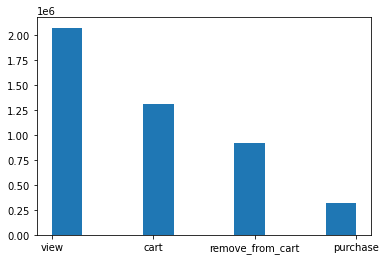

In [40]:
pd.unique(data['event_type'])

from matplotlib import pyplot as plt
plt.hist(data['event_type'])

(array([1.76309e+05, 2.14391e+05, 2.14960e+05, 1.34765e+05, 7.68180e+04,
        3.39880e+04, 4.30300e+04, 2.09930e+04, 1.40830e+04, 1.17740e+04,
        1.58010e+04, 6.89100e+03, 8.68100e+03, 9.15000e+03, 5.89200e+03,
        4.40400e+03, 3.38700e+03, 2.56900e+03, 1.35800e+03, 2.50700e+03,
        1.80900e+03, 1.45800e+03, 1.26100e+03, 1.31500e+03, 7.78000e+02,
        7.50000e+02, 9.73000e+02, 6.66000e+02, 1.00700e+03, 3.38000e+03,
        2.84000e+03, 1.77700e+03, 1.31300e+03, 6.88000e+02, 8.58000e+02,
        8.52000e+02, 5.79000e+02, 9.71000e+02, 8.86000e+02, 4.70000e+02,
        4.42000e+02, 7.84000e+02, 2.18000e+03, 1.62000e+02, 2.42000e+02,
        2.84000e+02, 1.20000e+01, 5.31000e+02, 3.93000e+02, 3.24000e+02,
        1.73100e+03, 2.83000e+02, 1.59100e+03, 1.32000e+02, 5.50000e+01,
        8.91000e+02, 7.70000e+01, 6.06000e+02, 1.10000e+01, 2.16000e+02,
        7.80000e+01, 5.30000e+02, 3.23000e+02, 5.34000e+02, 1.80000e+01,
        5.07000e+02, 1.21000e+02, 2.10000e+01, 2.32

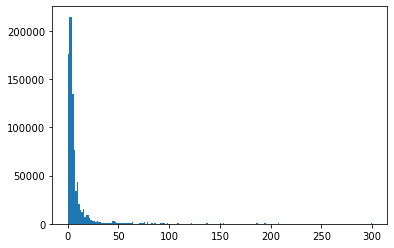

In [19]:
plt.hist(data['price'], bins=200 )

# 6.
### Let's create a session level dataset that includes: 
<li> user_id, user_session, session start time, total session duration, list of viewed product ids, list of purchased product_ids,
<li> list of product ids added to cart, total number of events, list of unique categories ids in the session

In [43]:
session_data = data.groupby(['session_id']).agg( # or use the original user_session
{
    'user_id': ["first","count"],
    'event_time' : "first",
    'duration_to_next_event': "sum",
    'funnel_number':"first",
    'index_in_funnel':"first",
    'price': lambda x: list(x),
    'product_id': lambda x: list(x),
    'event_type': lambda x: list(x),
    'category_id':lambda x: list(x)
    
}).reset_index()

session_data.columns = ['session_id','user_id',"num_of_event","session_start","duration",
                        "funnel_number","index_in_funnel","list_of_prices","list_of_prods","list_of_events","list_of_categories"]
session_data.sort_values(["user_id","session_start"], inplace=True)
session_data



,session_id,user_id,num_of_event,session_start,duration,funnel_number,index_in_funnel,list_of_prices,list_of_prods,list_of_events,list_of_categories
183,1120748_0,1120748,1,2019-11-04 15:28:57,0.0,0,1,[4.05],[5240],[view],[1487580009202712597]
669,1458813_0,1458813,1,2019-11-19 09:56:09,4719.0,0,1,[6.03],[5711145],[view],[1487580005008409427]
670,1458813_1,1458813,1,2019-11-19 11:14:48,88998.0,0,2,[2.3],[5814066],[view],[1487580005855658874]
671,1458813_2,1458813,28,2019-11-20 11:58:06,65074.0,0,3,"[7.46, 7.46, 7.46, 7.46, 6.03, 0.0, 4.83, 0.0,...","[5800358, 5800349, 5800349, 5800358, 5712576, ...","[view, view, view, view, view, view, view, vie...","[1487580005553668971, 1487580005553668971, 148..."
672,1458813_3,1458813,1,2019-11-21 06:02:40,0.0,0,4,[6.03],[5711087],[view],[1487580005008409427]
...,...,...,...,...,...,...,...,...,...,...,...
631620,579967088_0,579967088,1,2019-11-30 23:50:13,0.0,0,1,[14.29],[5881428],[view],[1487580013506068678]
631621,579968012_0,579968012,1,2019-11-30 23:53:24,0.0,0,1,[3.97],[5873630],[view],[1487580009471148064]
631622,579968623_0,579968623,5,2019-11-30 23:55:43,38.0,0,1,"[18.89, 21.59, 18.89, 19.52, 18.89]","[5892179, 5886282, 5892179, 5900651, 5892179]","[view, view, view, view, view]","[1487580013950664926, 1487580013950664926, 148..."
631623,579968937_0,579968937,1,2019-11-30 23:56:46,0.0,0,1,[7.14],[5790563],[view],[1487580008263189483]


In [39]:
session_data[['user_session','user_id','num_of_event','session_start','duration','list_of_prods','list_of_events']].to_csv("C:\\Users\\Anat\\PythonCode\\resources\\exams_datasets\\cosmetics_session_data.csv")


In [45]:
def getViewedProd(prods,events):
    viewed_prods = list()
    for ind in range(len(prods)):
        if(events[ind]=="view"):
            viewed_prods.append(prods[ind])
    return(viewed_prods)


def getAddedProd(prods,events):
    res_prods = list()
    for ind in range(len(prods)):
        if(events[ind]=="cart"):
            res_prods.append(prods[ind])
    return(res_prods)

def getPurchasedProd(prods,events):
    res_prods = list()
    for ind in range(len(prods)):
        if(events[ind]=="purchase"):
            res_prods.append(prods[ind])
    return(res_prods)

def get_payment(prods,events,prices):
    pay = 0
    for ind in range(len(prods)):
        if(events[ind]=="purchase"):
            pay = pay+prices[ind]
    return(pay)

In [47]:
## Adding session features:

session_data['list_of_viewed'] = session_data.apply(lambda row: getViewedProd(row.list_of_prods,row.list_of_events),axis=1)
session_data['list_of_addeded_to_cart'] = session_data.apply(lambda row: getAddedProd(row.list_of_prods,row.list_of_events),axis=1)
session_data['list_of_purchased'] = session_data.apply(lambda row: getPurchasedProd(row.list_of_prods,row.list_of_events),axis=1)
session_data['payment'] = session_data.apply(lambda row: get_payment(row.list_of_prods,row.list_of_events,row.list_of_prices),axis=1)
session_data['carts#'] = session_data['list_of_addeded_to_cart'].apply(len)
session_data["views#"] = session_data['list_of_viewed'].apply(len)
session_data["purchases#"] = session_data['list_of_purchased'].apply(len)
session_data['has_purchase'] = session_data["purchases#"]>0


In [51]:
session_data

,session_id,user_id,num_of_event,session_start,duration,funnel_number,index_in_funnel,list_of_prices,list_of_prods,list_of_events,list_of_categories,list_of_viewed,list_of_addeded_to_cart,list_of_purchased,payment,carts#,views#,purchases#,has_purchase
183,1120748_0,1120748,1,2019-11-04 15:28:57,0.0,0,1,[4.05],[5240],[view],[1487580009202712597],[5240],[],[],0.0,0,1,0,False
669,1458813_0,1458813,1,2019-11-19 09:56:09,4719.0,0,1,[6.03],[5711145],[view],[1487580005008409427],[5711145],[],[],0.0,0,1,0,False
670,1458813_1,1458813,1,2019-11-19 11:14:48,88998.0,0,2,[2.3],[5814066],[view],[1487580005855658874],[5814066],[],[],0.0,0,1,0,False
671,1458813_2,1458813,28,2019-11-20 11:58:06,65074.0,0,3,"[7.46, 7.46, 7.46, 7.46, 6.03, 0.0, 4.83, 0.0,...","[5800358, 5800349, 5800349, 5800358, 5712576, ...","[view, view, view, view, view, view, view, vie...","[1487580005553668971, 1487580005553668971, 148...","[5800358, 5800349, 5800349, 5800358, 5712576, ...",[],[],0.0,0,28,0,False
672,1458813_3,1458813,1,2019-11-21 06:02:40,0.0,0,4,[6.03],[5711087],[view],[1487580005008409427],[5711087],[],[],0.0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631620,579967088_0,579967088,1,2019-11-30 23:50:13,0.0,0,1,[14.29],[5881428],[view],[1487580013506068678],[5881428],[],[],0.0,0,1,0,False
631621,579968012_0,579968012,1,2019-11-30 23:53:24,0.0,0,1,[3.97],[5873630],[view],[1487580009471148064],[5873630],[],[],0.0,0,1,0,False
631622,579968623_0,579968623,5,2019-11-30 23:55:43,38.0,0,1,"[18.89, 21.59, 18.89, 19.52, 18.89]","[5892179, 5886282, 5892179, 5900651, 5892179]","[view, view, view, view, view]","[1487580013950664926, 1487580013950664926, 148...","[5892179, 5886282, 5892179, 5900651, 5892179]",[],[],0.0,0,5,0,False
631623,579968937_0,579968937,1,2019-11-30 23:56:46,0.0,0,1,[7.14],[5790563],[view],[1487580008263189483],[5790563],[],[],0.0,0,1,0,False
